# ML Feature enginerring - SelectKbest

In [28]:
%matplotlib inline
%run ../talibref.py
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Get data

In [2]:
#df=pd.read_csv("data/IYZ.csv")
ticker = 'IYZ'
startdate=datetime.date(2009, 12, 31)
enddate=datetime.date.today()
df = generate_ticker_data(ticker, startdate, enddate)

Available data: Ticker(IYZ) from 2000.05.26 to 2015.11.27
Usable data: Ticker(IYZ) from 2001.03.14 to 2015.11.27 
Returned data: Ticker(IYZ) from 2009.12.31 to 2015.11.27 
Save path: data/IYZ_from_2009.12.31_2015.11.27.csv


In [3]:
dftouse=df.copy()

### Feature Engineering

In [4]:
IGNORE = ['date', 'result_1','close_1','perf_1','result_14','close_14','perf_14','results']

In [5]:
INDICATORS=[]
for v in df.columns:
    l=df[v].unique()
    if len(l) <= 10 and v not in IGNORE:
        #print v, l
        INDICATORS.append(v)

In [6]:
STANDARDIZABLE = []
for v in df.columns:
    if v not in INDICATORS and v not in IGNORE:
        #print v
        STANDARDIZABLE.append(v)

In [7]:
dftouse['date'] = pd.to_datetime(dftouse['date'])
mask = (dftouse.date < '2014-12-31').values
mask.shape, mask.sum()

((1488L,), 1258)

#### 1.2 Standardize the data

Use the mask to compute the training and test parts of the dataframe. Use `StandardScaler` from `sklearn.preprocessing` to "fit" the columns in `STANDARDIZABLE` on the training set. Then use the resultant estimator to transform both the training and the test parts of each of the columns in the dataframe, replacing the old unstandardized values in the `STANDARDIZABLE` columns of `dftouse` by the new standardized ones.

In [8]:
#your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dftouse[mask][STANDARDIZABLE])
dftouse[STANDARDIZABLE] = scaler.transform(dftouse[STANDARDIZABLE])
dftouse.head()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal
0,2009-12-31,-1.201091,-1.239613,-1.220543,-1.265236,-0.008270,20.549999,True,0.026473,19.070000,False,-0.047453,1,-1.332303,-1.296524,-1.245343,0.175007,-0.145913,False,False,False,0,-1.473924,-1.612689,-1.595117,1,1,-1.615477,-1.695014,-1.685499,1,1,-1.266174,1,1.197050,0.755412,-0.763246,True,True,1,1.052312,1,0.093474,1,1.332842,1.558379,-0.279000,0,1.163484,1,1.588815,0,0.192107,0,0.607188,0,-0.417478,0,-0.156655,0,1.449704,1,-0.617705,0.285947,0,-1.224255,-1.201682,1,1.381892,1,-1.242212,-1.020557,-1.048089,-1.183834,-1.236724,-0.947053,-1.026232,0
1,2010-01-04,-1.167365,-1.155386,-1.150281,-1.116371,0.638583,20.680000,True,0.006326,18.719999,False,-0.089051,0,-1.319284,-1.277113,-1.219671,1.341483,-0.221063,False,True,False,0,-1.458621,-1.604374,-1.588638,1,1,-1.588448,-1.684346,-1.673483,1,1,-1.255717,1,1.217582,1.263539,-1.067442,True,True,1,1.312200,1,1.004830,1,1.387926,1.547044,-0.095395,0,1.162342,1,1.559683,0,1.443705,0,1.355867,0,0.191576,0,1.334706,0,1.561447,1,-0.269989,-0.148099,0,0.698039,-0.732061,0,1.448956,1,-1.141057,-0.825720,-0.888661,-1.049357,-1.173908,-0.727353,-0.907802,0
2,2010-01-05,-1.099915,-1.096427,-1.096882,-1.079857,2.142626,20.340000,False,-0.016441,18.900000,False,-0.086074,0,-1.294746,-1.258835,-1.207953,1.442826,-0.154935,False,True,False,0,-1.442453,-1.595657,-1.581828,1,1,-1.561351,-1.673068,-1.659668,1,1,-1.239756,1,1.293296,1.655441,-1.215555,True,True,1,1.377173,1,1.253848,1,1.455334,1.552644,0.079128,1,1.169243,1,1.643106,0,1.298933,0,1.504104,0,0.626435,0,1.120944,0,1.927408,1,0.257136,-0.227095,0,1.139066,0.256838,0,1.516808,1,-1.091416,-0.735518,-0.849930,-0.948727,-1.177549,-0.592085,-0.919817,0
3,2010-01-06,-1.069001,-1.104850,-1.150281,-1.175355,1.022106,20.260000,False,-0.003933,18.600000,False,-0.085546,0,-1.285061,-1.251184,-1.202451,0.550681,-0.133898,False,False,False,0,-1.430752,-1.588396,-1.576121,1,1,-1.542412,-1.663919,-1.651114,1,1,-1.215639,1,1.250911,1.079034,-0.844469,True,True,1,1.312200,1,0.658959,1,1.377076,1.540095,-0.107903,0,1.158204,1,1.401836,0,0.315018,0,0.702506,0,0.062282,0,0.212456,0,1.385121,1,0.803908,0.284862,0,-0.973098,0.361931,1,1.578204,1,-1.143867,-0.877135,-0.950811,-1.041123,-1.187564,-0.766123,-0.977316,0
4,2010-01-07,-1.175797,-1.203115,-1.181196,-1.197825,0.113288,20.110001,False,-0.007404,18.570000,False,-0.083416,0,-1.282289,-1.242399,-1.187670,0.302403,-0.202270,False,False,False,0,-1.420411,-1.581548,-1.570713,1,1,-1.522822,-1.655929,-1.642515,1,1,-1.193934,1,1.151281,0.829702,-0.625327,True,True,1,1.247228,1,0.087865,1,1.271081,1.506992,-0.319724,0,1.070066,1,1.153828,0,-0.190239,0,0.531060,0,-0.094912,0,-0.001305,0,0.969668,1,-0.050423,0.363933,0,-1.224255,-0.442426,1,1.631641,1,-1.194444,-0.974554,-1.048089,-1.090523,-1.236724,-0.859173,-1.070000,1


We create a list `lcols` of the columns we will use in our classifier. This list should not contain the response `RESP`. How many features do we have?

In [9]:
#lcols=list(dftouse.columns)
#lcols.remove(u'results')
lcols=[]
for c in list(dftouse.columns):
    if c not in IGNORE: 
        lcols.append(c)
print len(lcols)

70


### EDA for the data

We create a variable `ccols` which contains all variables not in our indicators list

In [10]:
ccols=[]
for c in lcols:
    if c not in INDICATORS and c not in IGNORE:
        ccols.append(c)
print len(ccols), len(INDICATORS)

44 26


In [11]:
def cv_optimize(clf, parameters, X, y, n_folds, score_func):
    fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    fitmodel.fit(X, y)
    return fitmodel.best_estimator_

In [12]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        #print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        #print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    #print "############# based on standard predict ################"
    #print "Accuracy on training data: %0.2f" % (training_accuracy)
    #print "Accuracy on test data:     %0.2f" % (test_accuracy)
    #print confusion_matrix(ytest, clf.predict(Xtest))
    #print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [13]:
X=dftouse[lcols].values
y=dftouse['results'].values
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]  
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [14]:
print "whole data set", dftouse['results'].mean()
print "training set", dftouse['results'][mask].mean(), "test set", dftouse['results'][~mask].mean()

whole data set 0.465725806452
training set 0.468203497615 test set 0.452173913043


#####our data is not very asymmetric, but we might still want to balance the trainset

### Balancing train set to test set for training, 
### intended to be used with SVM only

In [15]:
jtrain=np.arange(0, ytrain.shape[0])
n_pos=len(jtrain[ytrain==1])
n_neg=len(jtrain[ytrain==0])
print n_pos, n_neg

ineg = np.random.choice(jtrain[ytrain==0], n_pos, replace=False)
alli=np.concatenate((jtrain[ytrain==1], ineg))
Xtrain_new = Xtrain[alli]
ytrain_new = ytrain[alli]
print Xtrain_new.shape, ytrain_new.shape

reuse_split_balanced=dict(Xtrain=Xtrain_new, Xtest=Xtest, ytrain=ytrain_new, ytest=ytest)

589 669
(1178L, 70L) (1178L,)


## Test all classifiersres using SelectKbest

In [16]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression

def evaluate(clf):
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    df_pred = df[~mask].reset_index(drop=True)
    df_pred['pred_result'] = clf.predict(Xtest)
    df_pred['result_baseline'] = np.ones(df_pred.shape[0])
    _,_,ROI_base,_,_ = evaluate_profit(df_pred, startdate, enddate, 10000, 'result_baseline', 'close', False, [1])
    _,_,ROI_long,_,_ = evaluate_profit(df_pred, startdate, enddate, 10000, 'pred_result', 'close', False, [1])
    _,_,ROI_lgst,_,signals = evaluate_profit(df_pred, startdate, enddate, 10000, 'pred_result', 'close', False, [1,0])
    return training_accuracy, test_accuracy, ROI_base, ROI_long, ROI_lgst, signals

def print_result(clfpipe):     
    print "Number of features: {0}".format(clfpipe.get_params()['selectk__k'])
    print "Features: {0}".format(np.array(lcols)[clfpipe.named_steps['selectk'].get_support()].tolist())
    r = evaluate(clfpipe)
    print "train accuracy: {0}".format(r[0])
    print "test accuracy: {0}".format(r[1])
    print "ROI baseline: {0}".format(r[2])
    print "ROI long-only: {0}".format(r[3])
    print "ROI long-short: {0}".format(r[4])

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score

In [18]:
%%time
max_number_featrues = 10 
Long_ROI_result={}
models={}
print "#############====================== Log Regression =====================#############"
selectk = SelectKBest(score_func=f_regression)
pipeLR = Pipeline([('selectk', selectk), ('LR', LogisticRegression(penalty="l1"))])
pipeLR, _,_,_,_  = do_classify(pipeLR, {"selectk__k":range(1,max_number_featrues+1), 
                                        "LR__C": [1e-3, 1e-2, 1e-1, 1, 1e2]}, 
                               dftouse,lcols, u'results',1, reuse_split=reuse_split)

print pipeLR.get_params()['LR__C']
print_result(pipeLR)
Long_ROI_result["log_regression"] = evaluate(pipeLR)[3]
models["log_regression"] = pipeLR

#############====================== Log Regression =====================#############
0.1
Number of features: 4
Features: ['bb_pct', 'cci', 'rsi', 'stoch_slowk']
train accuracy: 0.694753577107
test accuracy: 0.713043478261
ROI baseline: 0.01705
ROI long-only: 0.1756605927
ROI long-short: 0.3529951048
Wall time: 2.32 s


In [19]:
%%time
print "#############====================== Linear SVM ========================#############"
clfsvm_b = Pipeline([('selectk', selectk), ('svm', LinearSVC(loss="hinge"))])
clfsvm_b,_,_,_,_  = do_classify(clfsvm_b, {"selectk__k":range(1,max_number_featrues+1), 
                                           "svm__C": [1e-300, 1e-200, 1e-100, 1e-10, 1e-1, 1]}, 
                                dftouse,lcols, u'results',1, reuse_split=reuse_split_balanced)

print clfsvm_b.get_params()['svm__C']
print_result(clfsvm_b)
Long_ROI_result["Linear_SVM"] = evaluate(clfsvm_b)[3]
models["Linear_SVM"] = clfsvm_b

#############====================== Linear SVM ========================#############
1e-300
Number of features: 10
Features: ['bb_pct', 'plus_di', 'cci', 'rsi', 'ult_osc', 'willr', 'stoch_slowk', 'stoch_slowd', 'stoch_fastk', 'stoch_fastd']
train accuracy: 0.680445151033
test accuracy: 0.686956521739
ROI baseline: 0.01705
ROI long-only: 0.1366878214
ROI long-short: 0.2634956166
Wall time: 2.34 s


In [20]:
%%time
print "#############====================== RBF SVM ===========================#############"
pipesvm2 = Pipeline([('selectk', selectk), ('svm2', SVC())])
pipesvm2,_,_,_,_  = do_classify(pipesvm2, {"selectk__k":range(1,max_number_featrues+1), 
                                            "svm2__C": [1e-100, 1e-10, 1e-1, 1, 1e10], 
                                            "svm2__gamma": [ 1e-9, 1e-10, 1e-11]}, 
                                 dftouse,lcols, u'results',1, reuse_split=reuse_split_balanced)
print pipesvm2.get_params()['svm2__C'], pipesvm2.get_params()['svm2__gamma']
print_result(pipesvm2)
Long_ROI_result["RBF_SVM"] = evaluate(pipesvm2)[3]
models["RBF_SVM"] = pipesvm2

#############====================== RBF SVM ===========================#############
10000000000.0 1e-09
Number of features: 10
Features: ['bb_pct', 'plus_di', 'cci', 'rsi', 'ult_osc', 'willr', 'stoch_slowk', 'stoch_slowd', 'stoch_fastk', 'stoch_fastd']
train accuracy: 0.689984101749
test accuracy: 0.686956521739
ROI baseline: 0.01705
ROI long-only: 0.1175109669
ROI long-short: 0.2213139269
Wall time: 29.5 s


In [21]:
%%time
print "#############====================== Random Forest =====================#############"
pipeRF = Pipeline([('selectk', selectk), ('RF', RandomForestClassifier())])
pipeRF,_,_,_,_  = do_classify(pipeRF, {"selectk__k": [5,6,7,8,9,10],
                                       "RF__max_depth": [3,5,7,10], 
                                       "RF__n_estimators": [5,10,20,40],
                                       "RF__max_features": [1,2,3,4,5]}, 
                              dftouse, lcols, u'results', 1, reuse_split=reuse_split)

print pipeRF.get_params()['RF__max_depth'], pipeRF.get_params()['RF__n_estimators'], pipeRF.get_params()['RF__max_features']
print_result(pipeRF)
Long_ROI_result["Random_forest"] = evaluate(pipeRF)[3]
models["Random_forest"] = pipeRF

#############====================== Random Forest =====================#############
3 10 2
Number of features: 10
Features: ['bb_pct', 'plus_di', 'minus_di', 'cci', 'rsi', 'ult_osc', 'willr', 'stoch_slowk', 'stoch_slowd', 'stoch_fastd']
train accuracy: 0.699523052464
test accuracy: 0.708695652174
ROI baseline: 0.01705
ROI long-only: 0.1736937522
ROI long-short: 0.348398476
Wall time: 1min 29s


In [22]:
%%time
print "#############====================== Extra Trees= =====================#############"
pipeET = Pipeline([('selectk', selectk), ('ET', ExtraTreesClassifier())])
pipeET, _,_,_,_  = do_classify(pipeET, {"selectk__k": [5,6,7,8,9,10],
                                        "ET__max_depth": [3,5,7,10,15,25,50], 
                                        "ET__n_estimators": [5,10,20,40],
                                        "ET__max_features": [1,2,3,4,5]}, 
                               dftouse, lcols, u'results', 1, reuse_split=reuse_split)
print "ET__max_depth: {0}".format(pipeET.get_params()['ET__max_depth']) 
print "ET__n_estimators: {0}".format(pipeET.get_params()['ET__n_estimators']) 
print "ET__max_features: {0}".format(pipeET.get_params()['ET__max_features']) 
print_result(pipeET)
Long_ROI_result["Extra_Trees"] = evaluate(pipeET)[3]
models["Extra_Trees"] = pipeET

#############====================== Extra Trees= =====================#############
ET__max_depth: 7
ET__n_estimators: 40
ET__max_features: 1
Number of features: 5
Features: ['bb_pct', 'plus_di', 'cci', 'rsi', 'stoch_slowk']
train accuracy: 0.722575516693
test accuracy: 0.691304347826
ROI baseline: 0.01705
ROI long-only: 0.1352567544
ROI long-short: 0.2581104887
Wall time: 1min 45s


In [23]:
%%time
print "#############====================== Gaussian NB ==========================#############"
pipeNB = Pipeline([('selectk', selectk), ('NB', GaussianNB())])
pipeNB,_,_,_,_ = do_classify(pipeNB, {"selectk__k":range(1,max_number_featrues+1)},
                             dftouse, lcols, u'results',1, reuse_split=reuse_split)
print_result(pipeNB)
Long_ROI_result["Gaussian_NB"] = evaluate(pipeNB)[3]
models["Gaussian_NB"] = pipeNB

#############====================== Gaussian NB ==========================#############
Number of features: 5
Features: ['bb_pct', 'plus_di', 'cci', 'rsi', 'stoch_slowk']
train accuracy: 0.692368839428
test accuracy: 0.673913043478
ROI baseline: 0.01705
ROI long-only: 0.0961226444
ROI long-short: 0.1773522541
Wall time: 482 ms


In [24]:
%%time
print "#############====================== Gradient Boosting ====================#############"
pipeGB = Pipeline([('selectk', selectk), ('GB', GradientBoostingClassifier())])
pipeGB, _,_,_,_  = do_classify(pipeGB, {"selectk__k":range(1,max_number_featrues+1), 
                                        "GB__n_estimators": [5,10,20,40],
                                        "GB__learning_rate": [0.1,0.5,1.0]}, 
                               dftouse,lcols, u'results',1, reuse_split=reuse_split)
print pipeGB.get_params()['GB__n_estimators'], pipeGB.get_params()['GB__learning_rate']
print_result(pipeGB)
Long_ROI_result["Gradient_Boosting"] = evaluate(pipeGB)[3]
models["Gradient_Boosting"] = pipeGB

#############====================== Gradient Boosting ====================#############
40 0.1
Number of features: 6
Features: ['bb_pct', 'plus_di', 'cci', 'rsi', 'willr', 'stoch_slowk']
train accuracy: 0.763116057234
test accuracy: 0.65652173913
ROI baseline: 0.01705
ROI long-only: 0.0957098489
ROI long-short: 0.1755636633
Wall time: 20.4 s


In [25]:
print "ROI baseline: {0}".format(evaluate(pipeGB)[2])
Long_ROI_result

ROI baseline: 0.01705


{'Extra_Trees': 0.13525675440000012,
 'Gaussian_NB': 0.096122644399999985,
 'Gradient_Boosting': 0.095709848899999811,
 'Linear_SVM': 0.13668782139999949,
 'RBF_SVM': 0.11751096689999958,
 'Random_forest': 0.17369375219999966,
 'log_regression': 0.1756605926999997}

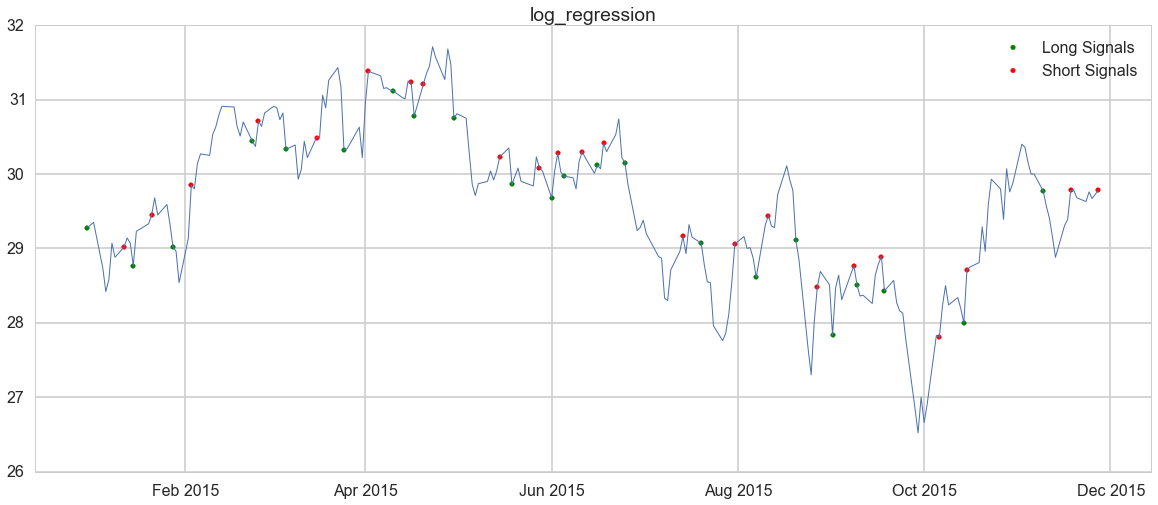

In [33]:
def plot_signal(model, title):
    fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
    ax0.plot(df.date[~mask], df.close[~mask], lw=1)
    short_days=zip(*evaluate(pipeLR)[5][0])[0]
    short_prices=zip(*evaluate(pipeLR)[5][0])[1]
    long_days=zip(*evaluate(pipeLR)[5][1])[0]
    long_prices=zip(*evaluate(pipeLR)[5][1])[1]
    ax0.scatter(long_days, long_prices, color='g', label="Long Signals") 
    ax0.scatter(short_days, short_prices, color='r', label="Short Signals")
    ax0.legend(frameon=False, loc='upper right')
    ax0.set_title(title)
    
plot_signal(pipeLR, 'log_regression')

In [ ]:
for k, v in models.items():
    plot_signal(v, k)